# **4. Недообучение и переобучение. Утечка данных**

✍ В этом юните мы поговорим об основных методах борьбы с **недообучением** и **переобучением**. Мы уже говорили о данных проблемах, когда обсуждали задачи регрессии и классификации. В этом модуле мы закрепим материал и рассмотрим основные способы борьбы с недообучением и переобучением. Для начала немного повторим теорию ↓

## Важной характеристикой алгоритма машинного обучения является его **обобщающая способность** — способность использовать знания, полученные при обучении, на новых данных.

Обобщающая способность часто страдает из-за двух основных проблем машинного обучения: **overfitting (переобучение)** и **underfitting (недообучение)**.

## **Переобучение (overfitting)** — это проблема, при которой модель чувствительна к незначительным колебаниям в данных в процессе обучения. По сути, такая модель работает намного лучше с обучающими данными, чем с новыми. Она была чрезмерно натренирована на обнаружение уникальных характеристик обучающего набора данных, которые не являются общими закономерностями.

## **Недообучение (underfitting)** — это проблема, при которой алгоритм недостаточно хорошо изучил данные и пропускает важные зависимости между признаками. В случае недообучения мы даже на обучающих данных не можем достичь приемлемых оценок для модели.

Недообучение и переобучение неразрывно связаны друг с другом: попытка бороться с одной проблемой может привести к возникновению другой, поэтому возникает **дилемма смещения-разброса (bias-variance tradeoff)**. 

## **Смещение (bias)** — это математическое ожидание (обозначено далее как $E$) разности между истинным ответом и ответом, выданным моделью. То есть это ожидаемая ошибка модели.

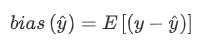

Bias — это теоретическая характеристика недообучения.

## **Разброс (variance)** — это вариативность ошибки, то, насколько ошибка будет отличаться, если обучать модель на разных наборах данных. Математически это дисперсия (разброс) ответов модели (обозначено далее как $Var$).

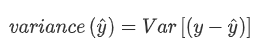

Variance — это теоретическая характеристика переобучения.

### **Примечание.** Определения, приведённые выше, справедливы для задачи регрессии. В задаче классификации тоже есть формальное определение bias и variance, а также теоретические результаты разложения ошибки на эти компоненты. Теоретические результаты разложения ошибки на bias и variance для регрессии и классификации можно посмотреть здесь.

В случае задачи регрессии underfitting и overfitting можно проиллюстрировать следующим образом:

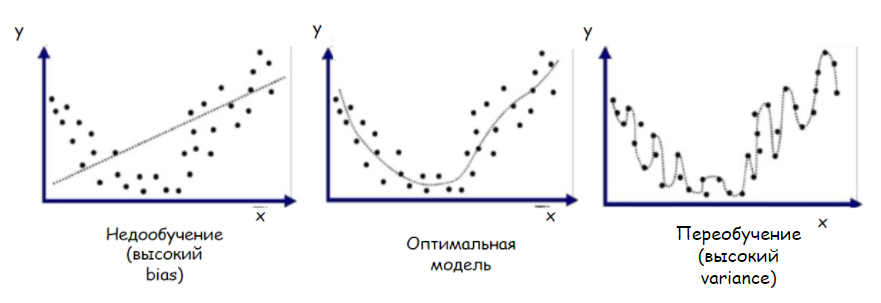

На первом графике изображена простая модель линейной регрессии, не способная уловить сложную зависимость в данных. На втором — оптимальная модель, которая хорошо описывает зависимость и при этом не имеет переобучения (полином четвёртой степени). На последнем графике изображён полином 27 степени, который подстроился под каждую точку в тренировочном наборе, но не смог уловить общие закономерности.

Underfitting и overfitting в случае задачи классификации:

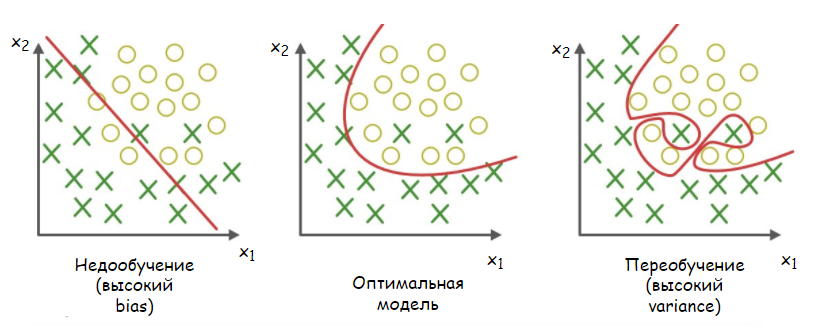

На рисунке изображены три различные модели: первая — простая логистическая регрессия, вторая — логистическая регрессия, обученная на полиномиальных признаках второй степени, третья — логистическая регрессия, обученная на полиномиальных признаках десятой степени. Видно, что первая модель обладает низким качеством и не обобщает общей зависимости (у неё высокое смещение). Третья же, напротив, идеально выделяет каждое наблюдение в правильный класс, но является переобученной и также не отражает общей зависимости (у неё высокий разброс). Оптимальной моделью является вторая, которая не подстраивается под индивидуальные наблюдения и отражает общую зависимость в данных.

### Проблема заключается в том, что в реальных условиях построить визуализацию модели, подобную приведённым выше, невозможно из-за размерности данных (если только мы не применим методы понижения размерности). Поэтому нужно уметь обнаруживать недообучение и переобучение другими способами.

### Если с недообучением всё понятно (измеряем метрику на тренировочной выборке и, если она нас не устраивает, делаем вывод, что модель недообучена), то с переобучением всё несколько сложнее. Переобучение является наиболее популярной проблемой, поэтому её необходимо уметь обнаруживать.

## Задание 4.1

Ниже представлено несколько регрессионных моделей (полиномы первой, второй и пятнадцатой степеней). Какая из приведённых моделей, по-вашему, является недообученной?

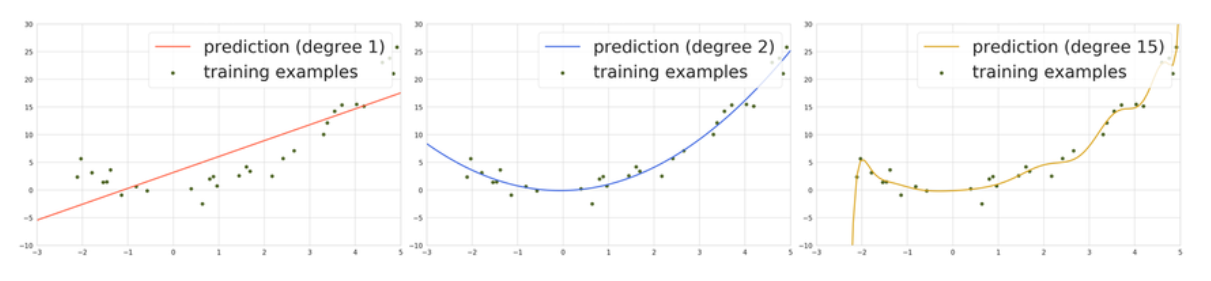

+ Полином первой степени

# КАК ОБНАРУЖИТЬ ПЕРЕОБУЧЕНИЕ

Переобучение легко детектируется с помощью изученных нами методов валидации: мы намеренно разбиваем выборку на тренировочную и валидационную (возможно, и тестовую) и смотрим на значения показателей на каждой из выборок, сравнивая их между собой.

### **Основные способы отследить переобучение:**

+ hold-out-разбиение,
+ k-fold-валидация и leave-one-out-валидация,
+ **кривые обучения (learning curves).**

Если качество на валидационной выборке стабильно хуже качества на тренировочной, то это явный признак переобучения.

Рассмотрим **пример**. Будем использовать тот же набор данных об образцах воды.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn') #стиль отрисовки seaborn
%matplotlib inline

water_data = pd.read_csv('water_potability.csv')

water_data['ph'] = water_data['ph'].fillna(water_data.groupby('Potability')['ph'].transform('median'))
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data.groupby('Potability')['Sulfate'].transform('median'))
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data.groupby('Potability')['Trihalomethanes'].transform('median'))

X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

Сначала проверим модель на переобучение с помощью отложенной (hold-out) выборки.

Для этого стратифицированно разобьём набор данных на тренировочную и валидационную выборки в соотношении 80/20 и обучим дерево решений с энтропией  в качестве критерия информативности и сбалансированными весами классов без ограничения его глубины и количества объектов в листе. Сделаем предсказание для каждой из выборок и рассчитаем метрику $F_1$-score:

In [2]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
#Создаём модель
model_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    class_weight='balanced', #веса классов
    random_state=42 #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке
model_bad.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model_bad.predict(X_train)
y_valid_pred = model_bad.predict(X_valid)
#Выводим значения метрик для тренировочной выборки
print('Train F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#Выводим значения метрик для валидационной выборки
print('Valid F1 score: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_pred)))

Train F1 score: 1.00
Valid F1 score: 0.67


+ Значение $F_1$-score на тренировочной выборке показывает, что задача классификации образцов воды на пригодные и непригодные для питья решена идеально. Метрика равна максимуму — 1, а значит, и precision и recall для каждого из классов равны 1 (значит, и значения всех остальных метрик тоже максимальны). То есть модель правильно определила класс для всех образцов воды из набора данных.
+ Однако значение $F_1$-score, полученное на валидационной выборке, менее оптимистично. Значение метрики на контроле значительно ниже, чем при обучении.

### Это типичная картина переобучения: модель дерева решений полностью адаптировалась под обучающий набор данных, но не нашла общих закономерностей, поэтому результаты на контроле оставляют желать лучшего.

Проверим гипотезу о наличии переобучения у нашего дерева с помощью кросс-валидации k-fold. Организуем стратифицированную кросс-валидацию на пяти фолдах. На каждом шаге кросс-валидации будем вычислять метрику  на тренировочных и валидационных фолдах.

In [3]:
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model_bad, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

{'fit_time': array([0.1410706 , 0.10563135, 0.08436632, 0.09980845, 0.08452272]),
 'score_time': array([0.00723267, 0.00477529, 0.0048213 , 0.00506425, 0.00468493]),
 'test_score': array([0.61445783, 0.68421053, 0.62332696, 0.63276836, 0.70119522]),
 'train_score': array([1., 1., 1., 1., 1.])}

В полученном словаре невооруженным глазом видно, что на тренировочных фолдах значения метрик равны 1, а вот на валидационных метриках ни разу не превысила значения 0.7.

Подсчитаем среднее значение $F_1$-score на выборках:

In [4]:
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.65


## Задание 4.2

Как определить наличие переобучения модели с помощью методов валидации?

+ Ошибка на валидации будет стабильно выше, чем на обучении.

# МЕТОДЫ БОРЬБЫ С ПЕРЕОБУЧЕНИЕМ

Мы посмотрели, как с помощью методов валидации можно определить наличие переобучения. Но как с ним бороться?

Существует несколько основных способов, и с каждым из них мы уже знакомились в нашем курсе. Ключевая идея, заложенная в каждом из методов, звучит так: **снизить переобучение = уменьшить разброс (вариативность) ошибки модели**:


1. УМЕНЬШЕНИЕ СЛОЖНОСТИ МОДЕЛИ

Это основной способ борьбы с переобучением, так как, по сути, повышенная сложность модели и является его причиной.

Рекомендации по уменьшению сложности моделей

+ Для **линейной (логистической) регрессии** с полиномиальными признаками уменьшение сложности модели означает понижение степени полинома.

Ниже приведены три полиномиальных модели, которые решают одну и ту же задачу, — полином первой (простая линейная регрессия), четвёртой и пятнадцатой степени. Для каждой модели рассчитана MSE (средний квадрат ошибки) между предсказанными значениями и истинной функцией. Видно, что наименьшей ошибкой обладает полином четвёртой степени.

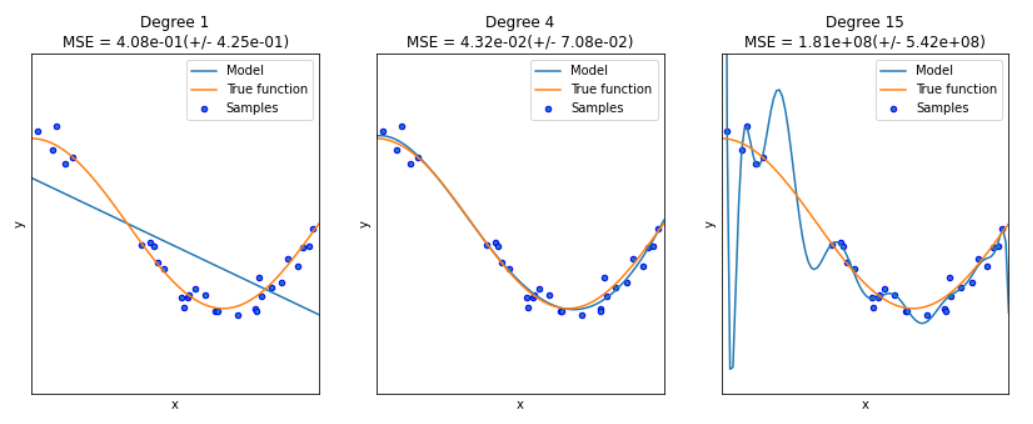

+ Для **деревьев решений** — «стрижка» (pruning) деревьев, то есть уменьшение их глубины (max_depth) и/или увеличение количества объектов, при которых вершина дерева превращается в лист (min_samples_leaf).

Пример переобученного дерева решений и его разделяющей поверхности до обрезки:

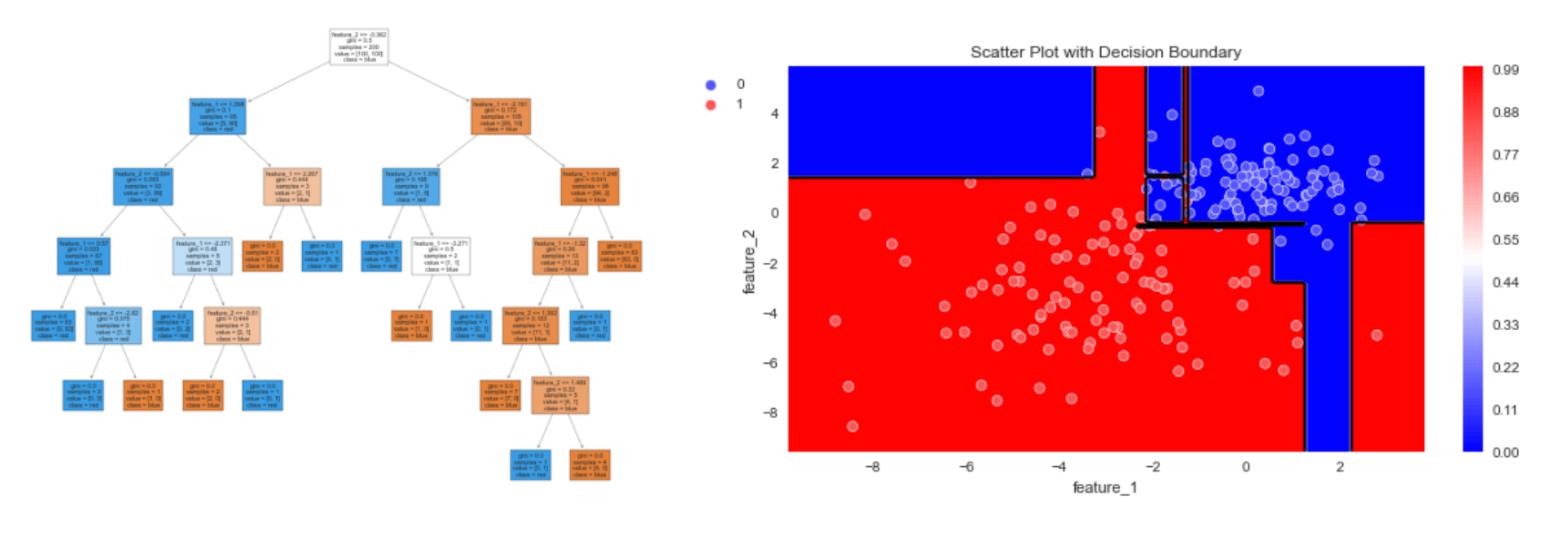

После обрезки (max_depth=3, min_samples_leaf=5):

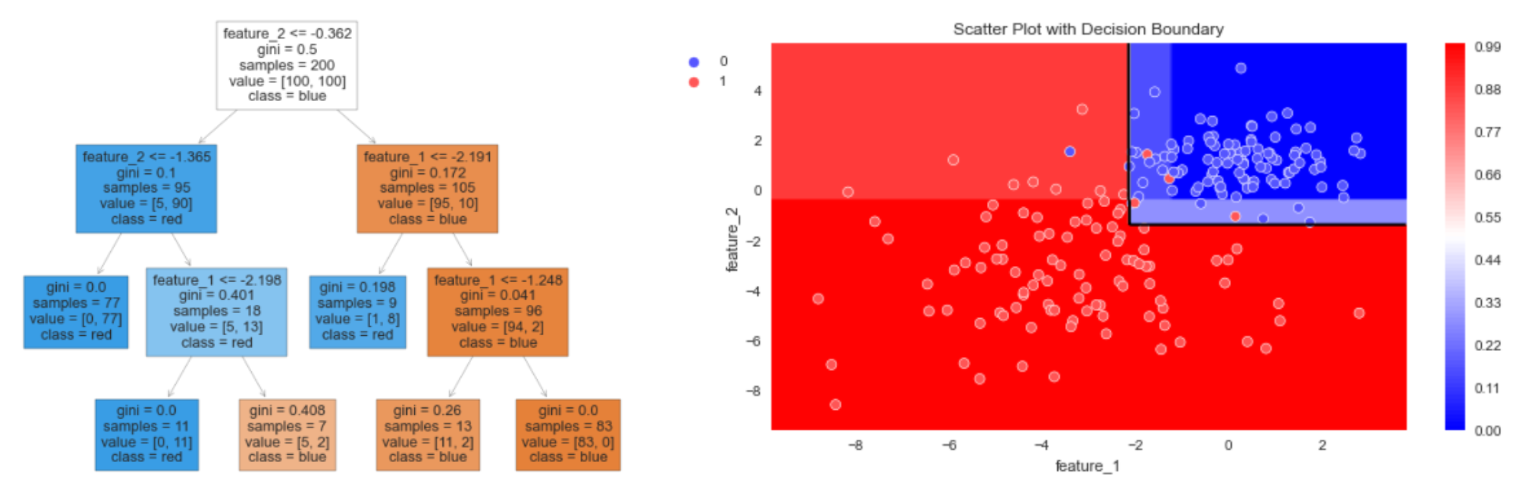

+ Для **случайного леса** — «стрижка» деревьев (max_depth и min_samples_leaf) и уменьшение количества признаков, на которых обучается каждое дерево (max_features).

2. РЕГУЛЯРИЗАЦИЯ

С помощью добавления штрафа в функцию потерь мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс. Закон баланса в действии!

Ранее мы изучали регуляризацию только в контексте линейных моделей, но на самом деле она есть и во многих других методах машинного обучения, с которыми мы будем знакомиться в дальнейшем.

На рисунке ниже приведено несколько примеров одной и той же модели — полинома восьмой степени с различными коэффициентами регуляризации (обозначен как lambda). Видно, что чем выше lambda, тем меньше переобучение. Однако есть риск увеличить lambda слишком сильно, и тогда модель превратится в недообученную (левый нижний рисунок).

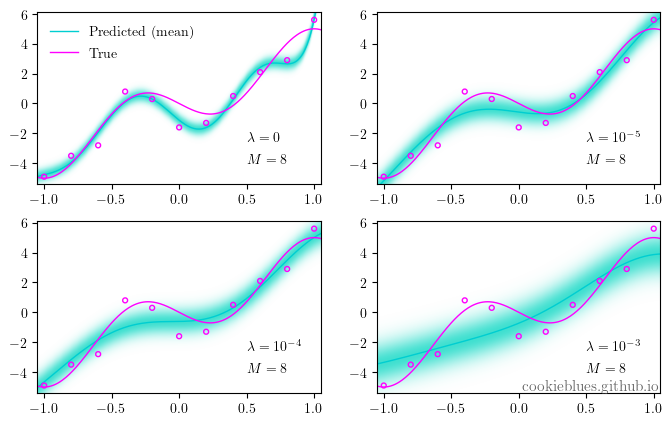



3. МАНИПУЛЯЦИИ С ДАННЫМИ

Ещё один верный способ побороть переобучение — увеличить или уменьшить количество примеров, на которых обучается модель.

+ Увеличивать набор данных можно за счёт проведения новых экспериментов и сбора новой информации.
+ Уменьшать набор данных можно за счёт удаления выбросов и аномалий из обучающего набора данных, из-за которых отчасти и происходит переобучение модели.

Также можно отбирать наиболее значимые признаки, которые в наибольшей степени влияют на предсказания модели.

*О применении метода работы с данными мы поговорим в следующем модуле.*

Сначала необходимо разобраться в причине переобучения модели. Для дерева решений установленный по умолчанию параметр max_depth будет означать, что дерево будет делиться до тех пор, пока не определит правильный класс для каждого объекта из обучающего набора данных.


---


На реальных данных, подверженных зашумлённости, такой подход в большинстве случаев приводит к переобучению дерева: глубина становится очень большой, и дерево не отражает общих зависимостей в данных.

В таком случае в первую очередь прибегают к «обрезке» деревьев путём ограничения максимальной глубины и/или увеличения количества объектов, при которых вершина дерева превращается в лист и деление прекращается.


---



---


Для начала посмотрим на текущую глубину дерева:

In [5]:
print('Current depth:', model_bad.get_depth())

Current depth: 27


Дерево глубиной 27 — это очень сложная модель. Давайте попробуем её упростить, добавив в дерево решений ограничение на глубину (max_depth). Пусть максимальная глубина дерева будет равна 7.

In [10]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #ограничиваем глубину дерева
    random_state=42, #генератор случайных чисел
    class_weight='balanced' #веса классов
)
 
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 0.75
Valid k-fold mean f1: 0.66


После ограничения максимальной глубины удалось уменьшить разницу между метриками на тренировочных и валидационных фолдах кросс-валидации.

### Попробуем добавить ещё одно ограничение к нашему дереву: увеличим количество объектов, которых достаточно для образования листа дерева (min_samples_leaf). По умолчанию этот параметр равен 1.

Напомним интерпретацию данного параметра. Пусть min_samples_leaf=5. Допустим, в результате разделения получается две вершины: первая — с четырьмя объектами, а вторая — с шестью. Тогда дерево разрешит снова делиться только второй вершине (6 > min_samples_leaf), а первая вершина (4 < min_samples_leaf) дерева превратится в лист, и её деление будет остановлено.

In [11]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #ограничиваем глубину дерева
    min_samples_leaf=5, #увеличиваем количество объектов в листе
    random_state=42, #генератор случайных чисел
    class_weight='balanced' #веса классов
)
 
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 0.74
Valid k-fold mean f1: 0.66


Нам удалось ещё немного сократить разницу между метриками на тренировочных и валидационных фолдах и уменьшить переобучение.

### Примечание. В приведённом выше примере мы выбирали параметры исключительно по принципу «холодно-горячо». Конечно же, в реальности никто так не делает — существуют специальные механизмы перебора комбинаций внешних параметров модели, и мы познакомимся с ними в отдельном модуле.

## Задание 4.5

Отметьте способы, которые позволяют избавиться от переобучения:

+ Усиление параметров регуляризации
+ Уменьшение сложности модели
+ Добавление новых данных

# **УТЕЧКА ДАННЫХ**

Стоит упомянуть об ещё одной проблеме современного машинного обучения, которая называется **утечкой данных**. Данная проблема несколько похожа на проблему переобучения, но имеет другой характер.

## **Утечка данных (data leak)** — это ситуация, в которой данные, используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной.

Приведём **несколько примеров, когда может возникнуть утечка данных:**

1. ОЧЕВИДНЫЕ СЛУЧАИ

+ Наиболее очевидной ситуацией утечки данных является **включение целевой переменной**, которую мы пытаемся предсказать, **в качестве фактора**, что полностью уничтожает цель «прогнозирования». Это может быть сделано по ошибке, но важно убедиться, что целевая переменная отличается от признаков.

+ Другой распространённой причиной утечки данных является **включение тестовых данных в данные по обучению** модели, а затем **использование этих же тестовых данных для оценки качества** модели.

Два этих случая возникают скорее по невнимательности, и их легко обнаружить. Более опасные причины — скрытые.

2. СКРЫТЫЕ СЛУЧАИ, ИЛИ GIVEAWAY-ПРИЗНАКИ

**Giveaway** — это признаки, которые раскрывают информацию о целевой переменной и не будут доступны после развёртывания модели в реальных условиях. Такие признаки необходимо удалять из данных перед построением модели.

**Пример № 1**

Мы строим модель для прогнозирования определённого состояния здоровья человека. У нас есть признак, который указывает на то, была ли у пациента операция, связанная с тем же заболеванием, которое мы предсказываем.

Указание на хирургическое вмешательство в высокой степени предсказывает состояние здоровья, и, вероятно, эта информация будет доступна далеко не всегда (в основном в случаях рецидива).

Если мы уже знаем, что пациент перенёс операцию, что могло сказаться на состоянии здоровья, нам может даже не понадобиться прогнозирующая модель.

**Пример № 2**

Мы прогнозируем, продолжит ли юзер пользоваться нашим приложением после какой-то определённой даты.

Включение признаков, предоставляющих информацию о будущих посещениях приложения, опять же приведёт к утечке данных.

Мы должны использовать только признаки, описывающие предыдущие сеансы, так как информация о будущих сеансах будет недоступна после развёртывания модели.

## Из-за утечки данных прогноз модели становится очень оптимистичным. Вы получаете потрясающее качество во время обучения модели, радуетесь сами и радуете своего заказчика. Однако когда дело доходит до использования модели в реальных условиях, оказывается, что у вас **недостаточно данных для построения прогноза**.

# **КАК ОБНАРУЖИТЬ УТЕЧКУ ДАННЫХ**

+ **Читайте описание признаков.**

Из описания признаков всегда можно узнать полезную информацию и обнаружить утечку с помощью банальной логики. Если вы предсказываете цену товара, а в вашем наборе данных есть признак цены этого товара со скидкой, очевидно, что данный признак стоит удалить из обучающего набора данных.

+ **Проверяйте корреляции с целевым признаком.**

В процессе разведывательного анализа вы можете обнаружить признаки, которые очень сильно коррелируют с целевой переменной. Конечно, такая корреляция может быть естественной и не сопровождаться утечкой, например корреляция между количеством комнат в квартире и её ценой. Однако высокая степень корреляции между налоговой выплатой за продажу и ценой квартиры — это яркий пример утечки.

+ **Относитесь скептически к подозрительно высокому качеству моделей.**

При построении модели вас может насторожить слишком высокое качество даже самых простых моделей, которого в реальных условиях достичь не удалось бы. Это может быть сигналом о наличии утечки данных.

Поэтому для начала старайтесь строить baseline — простые модели машинного обучения, такие как логистическая регрессия.

✍ Утечка данных — широко распространённая проблема в машинном обучении. Начинающие исследователи часто допускают ошибки в построении моделей на данных, содержащих утечку.

Мы обучаем модели с известными данными и ожидаем, что модель будет выполнять прогнозирование с таким же хорошим качеством и в реальных условиях. Для получения качественных показателей в этих прогнозах, модель должна хорошо обобщать данные. Утечка не позволяет модели этого делать и, таким образом, вызывает ложные предположения о качестве модели. Для получения надёжной модели прогнозирования мы должны уделять пристальное внимание выявлению и предотвращению утечки данных.

## Задание 4.8

Что такое утечка данных в машинном обучении?

+ Ситуация, в которой данные, используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.

## Задание 4.9

Выберите ситуации, которые можно назвать утечкой данных:

+ Включение целевого признака в обучающий набор данных.
+ Включение объектов из тренировочного набора данных в валидационный (тестовый).
+ Включение столбца «месячный оклад» при прогнозировании средней заработной платы за год.



---



---



## Задание 4.3

Ниже представлен код для генерации задачи классификации и отрисовки диаграммы рассеяния с цветовой группировкой по классам.

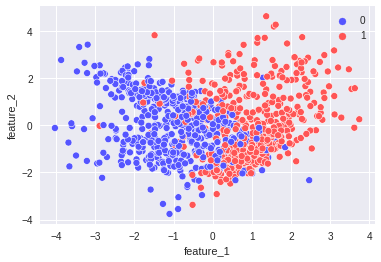

In [ ]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');

Разделите исходный набор данных на тренировочную и валидационную выборки в соотношении 70/30, используя функцию train_test_split(). В качестве значения параметра random_state возьмите число 42.

Обучите модель дерева решений с глубиной 10 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке. Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.

В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
print('Train accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))

Train accuracy: 0.98
Valid accuracy: 0.81


## Задание 4.4 (на самопроверку)

Воспользуйтесь функцией plot_probabilities_2d() и постройте разделяющую поверхность обученного дерева решений.

Примечание. Код функции plot_probabilities_2d() вы можете найти в задании 3.6.

Передайте в её аргументы матрицу наблюдений X, вектор ответов y и обученное в задании 4.3 дерево решений.

Является ли ваша модель переобученной?

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


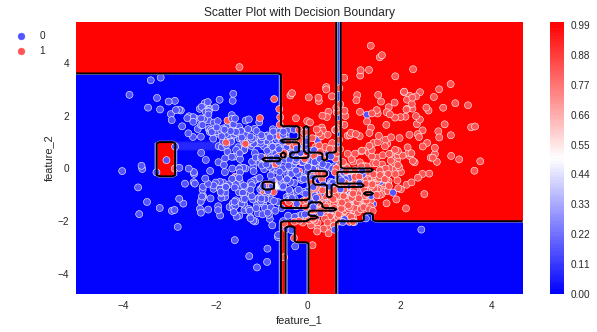

In [ ]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

plot_probabilities_2d(X, y, clf)

## Задание 4.6

Для выполнения этого задания используйте сгенерированные тренировочную и валидационную выборки из задания 4.3.

Обучите модель дерева решений с глубиной 3 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке.

Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.

В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.

Train accuracy: 0.88
Valid accuracy: 0.85


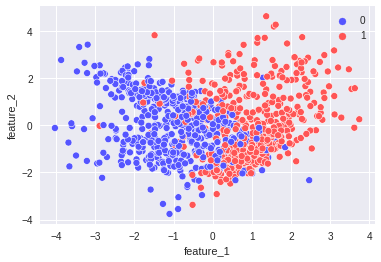

In [ ]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)

sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');

X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)

print('Train accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))

## Задание 4.7 (на самопроверку)

Воспользуйтесь функцией plot_probabilities_2d() и постройте разделяющую поверхность обученного дерева решений.

Примечание. Код функции plot_probabilities_2d() вы можете найти в задании 3.6.

Передайте в её аргументы матрицу наблюдений X, вектор ответов y и обученное в задании 4.6 дерево решений.

Удалось ли вам избавиться от переобучения модели?

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


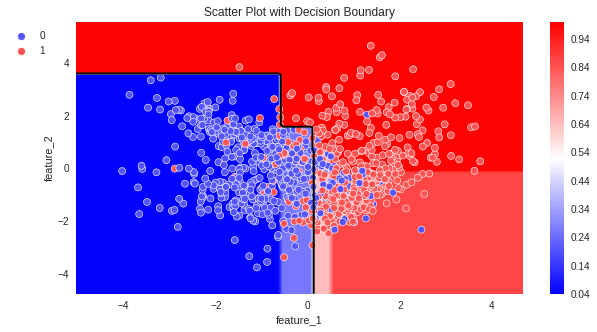

In [ ]:
plot_probabilities_2d(X, y, clf)